In [1]:
import pandas as pd
df = pd.read_csv("data.csv")
#Exploring the dataset
print(df.describe())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

In [2]:
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [3]:
#Classified the features according to their datatypes
obj = (df.dtypes == 'object')
obj_columns = list(obj[obj].index)
int_ = (df.dtypes == "int64")
int_columns = list(int_[int_].index)
flt = (df.dtypes == "float64")
flt_columns = list(flt[flt].index)
print(obj_columns)
print(int_columns)
print(flt_columns)

['date', 'street', 'city', 'statezip', 'country']
['sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
['price', 'bedrooms', 'bathrooms', 'floors']


In [4]:
#At the exploring stage, I saw that there is zero price datas
print(df["price"].mode()) #I saw that the mode of price is zero
price_mask1 = df["price"] == 0 #Then I masked it
print(price_mask1.value_counts()) #There was 49 of zeros
df.drop(df[price_mask1].index,inplace=True) #And I dropped those rows.

print(df.describe())

0    0.0
Name: price, dtype: float64
price
False    4551
True       49
Name: count, dtype: int64
              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.551000e+03  4551.000000  4551.000000   4551.000000  4.551000e+03   
mean   5.579059e+05     3.394639     2.155021   2132.372226  1.483528e+04   
std    5.639299e+05     0.904595     0.776351    955.949708  3.596408e+04   
min    7.800000e+03     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.262643e+05     3.000000     1.750000   1460.000000  5.000000e+03   
50%    4.650000e+05     3.000000     2.250000   1970.000000  7.680000e+03   
75%    6.575000e+05     4.000000     2.500000   2610.000000  1.097800e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4551.000000  4551.000000  4551.000000  4551.000000  4551.000000   
mean      1.512195     0.006592     0.234674     3.449352  18

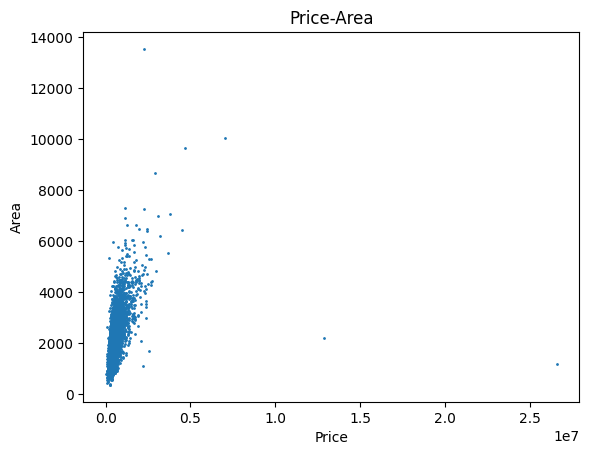

In [5]:
#Then visualized price-area relation
import matplotlib.pylab as plt

plt.scatter(df.loc[:,"price"],df.loc[:,"sqft_living"], s=1)
plt.title("Price-Area")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()


In [6]:
#From the visualization I saw that there was outliers.
#So I removed the outliers by standart deviation rule (normally three sigma buy I changed it according to my tests)
std_deviation = df["price"].std()
lower_limit = df["price"] < df["price"].mean() - (std_deviation//2)
upper_limit = df["price"] > df["price"].mean() + 2*std_deviation
df.drop(df[lower_limit].index,inplace=True)
df.drop(df[upper_limit].index,inplace=True)
df.describe()

C:\Users\Resul\AppData\Local\Temp\ipykernel_33432\1959977619.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[upper_limit].index,inplace=True)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,3.748000e+03,3748.000000,3748.000000,3748.000000,3.748000e+03,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000
mean,5.744981e+05,3.453308,2.235859,2214.688100,1.538486e+04,1.561499,0.005336,0.243863,3.449039,1886.988260,327.699840,1971.933831,783.592583
std,2.532864e+05,0.884409,0.720381,864.603887,3.798355e+04,0.543804,0.072864,0.771993,0.671440,820.357331,457.747513,30.583157,974.052874
min,2.760000e+05,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.900000e+05,3.000000,1.750000,1587.500000,4.905000e+03,1.000000,0.000000,0.000000,3.000000,1250.000000,0.000000,1951.000000,0.000000
50%,5.100000e+05,3.000000,2.500000,2100.000000,7.486000e+03,1.500000,0.000000,0.000000,3.000000,1684.500000,0.000000,1977.000000,0.000000
75%,6.850000e+05,4.000000,2.500000,2700.000000,1.116675e+04,2.000000,0.000000,0.000000,4.000000,2400.000000,670.000000,1999.000000,1998.000000
max,1.681000e+06,9.000000,5.750000,7320.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,7320.000000,2850.000000,2014.000000,2014.000000


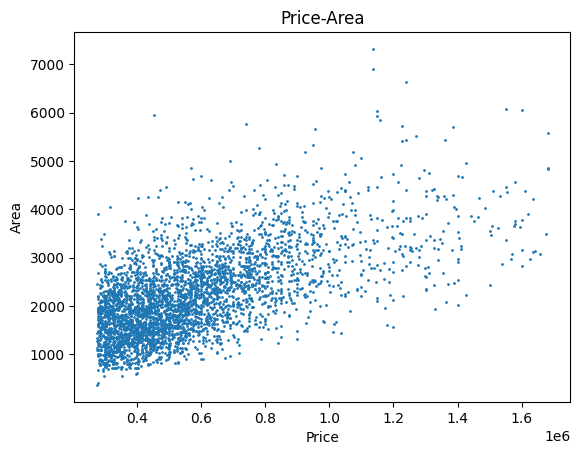

In [7]:
#After the removing of outliers, visualized price-area relation again and saw that the graph was better.
plt.scatter(df.loc[:,"price"],df.loc[:,"sqft_living"], s=1)
plt.title("Price-Area")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

In [8]:
#Checked data types of the rows again
print(obj_columns)
print(int_columns)
print(flt_columns)

['date', 'street', 'city', 'statezip', 'country']
['sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
['price', 'bedrooms', 'bathrooms', 'floors']


In [9]:
#Dropped unnecessary object type (string) columns
#Date and country was same for all rows, and street was unique for all rows. So those are cleaned
df.drop(["date","street","country"], axis="columns", inplace=True)

In [10]:
#Exploring the statezip and city features for encoding
print(df["statezip"].value_counts())
print(df["city"].value_counts())

statezip
WA 98103    148
WA 98052    133
WA 98117    130
WA 98115    128
WA 98006    106
           ... 
WA 98050      2
WA 98039      2
WA 98068      1
WA 98354      1
WA 98288      1
Name: count, Length: 76, dtype: int64
city
Seattle                1389
Bellevue                263
Redmond                 228
Renton                  228
Kirkland                181
Issaquah                180
Sammamish               167
Woodinville             112
Shoreline               105
Kent                     98
Auburn                   88
Snoqualmie               68
Maple Valley             68
Mercer Island            68
Kenmore                  63
Federal Way              62
North Bend               45
Duvall                   37
Burien                   37
Lake Forest Park         33
Bothell                  33
Newcastle                33
Vashon                   26
Des Moines               23
Carnation                19
Normandy Park            15
Enumclaw                 14
Covington       

In [11]:
# I applied target encoding to 'state' and 'city' to convert them into numerical features 
# reflecting their average effect on house prices.
from category_encoders import TargetEncoder

cols = ["statezip","city"]

for col in cols:
    te = TargetEncoder()
    te.fit(X=df[col],y=df ["price"] )
    values = te.transform(df[col])
    values.columns = [f"{col}_te"]
    df = pd.concat([df,values],axis=1)

df.head()
df.drop(["city","statezip"],axis="columns",inplace=True)
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip_te,city_te
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,401388.189581,418498.186557
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,380345.745962,355742.537067
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,583404.725617,768765.203860
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,632405.840765,665709.169537
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,602274.752567,584312.645479


In [12]:
#Exploring other features
print("Water front values:")
print("Water front median : ", df.loc[:,"waterfront"].median())
print("Water front mode : ", df.loc[:,"waterfront"].mode())
print("Water front mean : ", df.loc[:,"waterfront"].mean())
print("Water front max : ", df.loc[:,"waterfront"].max())
print()
print(df["waterfront"].value_counts())
print()
print("View values:")
print("View median : ", df.loc[:,"view"].median())
print("View mode : ", df.loc[:,"view"].mode())
print("View mean : ", df.loc[:,"view"].mean())
print("View max : ", df.loc[:,"view"].max())
print(df["view"].value_counts())

Water front values:
Water front median :  0.0
Water front mode :  0    0
Name: waterfront, dtype: int64
Water front mean :  0.005336179295624333
Water front max :  1

waterfront
0    3728
1      20
Name: count, dtype: int64

View values:
View median :  0.0
View mode :  0    0
Name: view, dtype: int64
View mean :  0.24386339381003203
View max :  4
view
0    3359
2     180
3      99
1      61
4      49
Name: count, dtype: int64


In [13]:
#Water front was almost same for all the dataset, so I dropped it.
df.drop(["waterfront"],axis="columns",inplace=True)

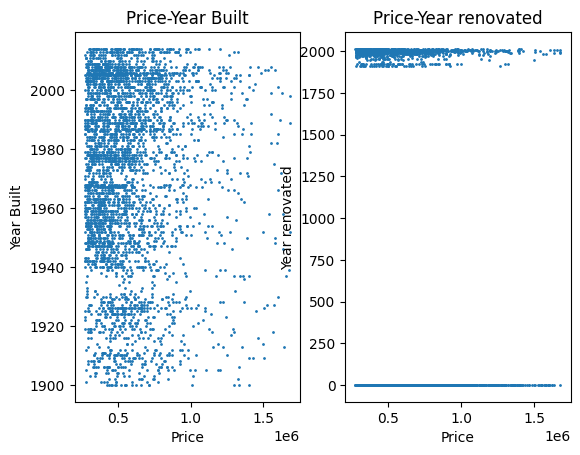

In [14]:
#Exploring the features by visualization
plt.subplot(1,2,1)
plt.scatter(df.loc[:,"price"],df.loc[:,"yr_built"], s=1)
plt.title("Price-Year Built")
plt.xlabel("Price")
plt.ylabel("Year Built")
plt.subplot(1,2,2)
plt.scatter(df.loc[:,"price"],df.loc[:,"yr_renovated"], s=1)
plt.title("Price-Year renovated")
plt.xlabel("Price")
plt.ylabel("Year renovated")
plt.show()

In [15]:
#Saw that there is a lot of non-renovated building, So I added new feature by named "has_renovation".
import numpy as np

df['has_renovation'] = np.where(df['yr_renovated'] == 0, 0, 1)
df['yr_renovated'] = df['yr_renovated'].replace(0, np.nan)

#For non-renovated building, changed that feature by building year
df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

print(df.head())
print(df.describe())


#According to result of my training and testing process, I decided to add new features for more accurated tests.
#Added price_per_sqft and price_per_sqftlot features
df['price_per_sqft'] = df['price'] / df['sqft_living']
df['price_per_sqftlot'] = df['price'] / df['sqft_lot']

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  313000.0       3.0       1.50         1340      7912     1.5     0   
2  342000.0       3.0       2.00         1930     11947     1.0     0   
3  420000.0       3.0       2.25         2000      8030     1.0     0   
4  550000.0       4.0       2.50         1940     10500     1.0     0   
5  490000.0       2.0       1.00          880      6380     1.0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3        1340              0      1955        2005.0   
2          4        1930              0      1966        1966.0   
3          4        1000           1000      1963        1963.0   
4          4        1140            800      1976        1992.0   
5          3         880              0      1938        1994.0   

     statezip_te        city_te  has_renovation  
0  401388.189581  418498.186557               1  
2  380345.745962  355742.537067               0  
3  58340

In [16]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip_te,city_te,has_renovation,price_per_sqft,price_per_sqftlot
count,3.748000e+03,3748.000000,3748.000000,3748.000000,3.748000e+03,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3.748000e+03,3748.000000,3748.000000,3748.000000,3748.000000
mean,5.744981e+05,3.453308,2.235859,2214.688100,1.538486e+04,1.561499,0.243863,3.449039,1886.988260,327.699840,1971.933831,1985.462647,5.797427e+05,575926.815576,0.393010,274.468967,98.726820
std,2.532864e+05,0.884409,0.720381,864.603887,3.798355e+04,0.543804,0.771993,0.671440,820.357331,457.747513,30.583157,27.185481,1.412641e+05,113762.444764,0.488484,99.768487,95.665711
min,2.760000e+05,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,1900.000000,3.655832e+05,355742.537067,0.000000,71.611253,0.505019
25%,3.900000e+05,3.000000,1.750000,1587.500000,4.905000e+03,1.000000,0.000000,3.000000,1250.000000,0.000000,1951.000000,1975.000000,4.701818e+05,511391.046902,0.000000,203.703704,40.496704
50%,5.100000e+05,3.000000,2.500000,2100.000000,7.486000e+03,1.500000,0.000000,3.000000,1684.500000,0.000000,1977.000000,1996.000000,5.784760e+05,584312.645479,0.000000,260.447854,69.047222
75%,6.850000e+05,4.000000,2.500000,2700.000000,1.116675e+04,2.000000,0.000000,4.000000,2400.000000,670.000000,1999.000000,2005.000000,6.393640e+05,628989.672279,1.000000,326.021739,121.247633
max,1.681000e+06,9.000000,5.750000,7320.000000,1.074218e+06,3.500000,4.000000,5.000000,7320.000000,2850.000000,2014.000000,2014.000000,1.011961e+06,955042.617100,1.000000,769.230769,1053.977273


In [17]:
#Created test and traing datas, imported evaluation metrics.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression

regressionModel = LinearRegression(fit_intercept=True)
regressionModel.fit(X_train,Y_train)

regressionPredict = regressionModel.predict(X_test)
mae = mean_absolute_error(Y_test, regressionPredict)
r2 = r2_score(Y_test, regressionPredict)
print(f"MAE: {mae}")
print(f"R²: {r2}")


MAE: 52466.35046697035
R²: 0.8857518916540567


In [19]:
from sklearn.ensemble import RandomForestRegressor

randomForestModel = RandomForestRegressor(n_estimators=13, random_state=0)
randomForestModel.fit(X_train, Y_train)

randomForestPredict = randomForestModel.predict(X_test)
mae = mean_absolute_error(Y_test, randomForestPredict)
r2 = r2_score(Y_test, randomForestPredict)

print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 11842.147537342464
R²: 0.9895770306825091


In [20]:
from xgboost import XGBRegressor

xgbRegressor = XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=5)
xgbRegressor.fit(X_train, Y_train)
xgbRegressorPredict = xgbRegressor.predict(X_test)
mae = mean_absolute_error(Y_test, xgbRegressorPredict)
r2 = r2_score(Y_test, xgbRegressorPredict)

print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 10944.514255393333
R²: 0.9941853731181565


At the final, trained three different model

Lineer Regression
Mean Absolute Error : 52466.35
R^2 Score : 0.88

Random Forest 
Mean Absolute Error : 11842.14
R^2 Score : 0.98

XGBRegressor
Mean Absolute Error : 10944.51
R^2 Score : 0.99

XGBRegressor is best one.
The MAE is about $11,000, which means on average the predictions are really close to the real house prices—around 2% of the average price ($574,000). The R² score is 0.99, so the model can explain almost all the variation in the data. Considering that house prices range from $276,000 to $1,681,000 and the standard deviation is $253,000, I think the model is working really well and can predict house prices reliably.